Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2024-2025
<u>**Hands-on Activity 3.1** | **Convolutional Neural Network**
**Name** | Cu, Angelo Luis C.
**Section** | CPE32S3
**Date Performed**: | 3/31/2025
**Date Submitted**: | 3/31/2025
**Instructor**: | Engr. Roman Richard

<hr>

# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [3]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [4]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


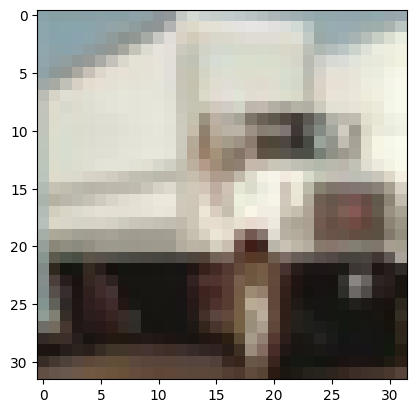

In [5]:
print(y_train[444])
plt.imshow(x_train[444]);

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [9]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

c:\Users\cu\anaconda3\envs\test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [11]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2907 - loss: 1.9277 - val_accuracy: 0.4826 - val_loss: 1.4184
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4657 - loss: 1.4837 - val_accuracy: 0.5370 - val_loss: 1.3040
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5110 - loss: 1.3648 - val_accuracy: 0.5603 - val_loss: 1.2163
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5412 - loss: 1.2944 - val_accuracy: 0.5795 - val_loss: 1.1743
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5623 - loss: 1.2332 - val_accuracy: 0.5873 - val_loss: 1.1747
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5751 - loss: 1.1987 - val_accuracy: 0.6019 - val_loss: 1.1164
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5894 - loss: 1.1637 - val_accuracy: 0.6002 - val_loss: 1.1381
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6035 - loss: 1.1334 - 

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [12]:
# Using PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [34]:
# Getting the CIFAR10 dataset and creating a dataloader
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In [35]:
from torch.utils.data import DataLoader

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64


In [76]:
# Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=5),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(128, 128, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),
            nn.Flatten(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [77]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y.to(device)).item()
            correct += (pred.argmax(1) == y.to(device)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [78]:
learning_rate = 1e-3
batch_size = 64
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307809  [   64/50000]
loss: 2.305160  [ 6464/50000]
loss: 2.297883  [12864/50000]
loss: 2.308858  [19264/50000]
loss: 2.303922  [25664/50000]
loss: 2.304039  [32064/50000]
loss: 2.301933  [38464/50000]
loss: 2.295412  [44864/50000]
Test Error: 
 Accuracy: 10.3%, Avg loss: 2.302668 

Epoch 2
-------------------------------
loss: 2.306382  [   64/50000]
loss: 2.304052  [ 6464/50000]
loss: 2.296842  [12864/50000]
loss: 2.307552  [19264/50000]
loss: 2.302254  [25664/50000]
loss: 2.302685  [32064/50000]
loss: 2.300425  [38464/50000]
loss: 2.295845  [44864/50000]
Test Error: 
 Accuracy: 12.8%, Avg loss: 2.301470 

Epoch 3
-------------------------------
loss: 2.305499  [   64/50000]
loss: 2.303321  [ 6464/50000]
loss: 2.296078  [12864/50000]
loss: 2.306603  [19264/50000]
loss: 2.300703  [25664/50000]
loss: 2.301379  [32064/50000]
loss: 2.299004  [38464/50000]
loss: 2.296086  [44864/50000]
Test Error: 
 Accuracy: 11.5%, Avg loss: 2.300224 

Epoc

In [84]:
# Define a 2nd Neural Network, changing the output sizes and adding batch normalization
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(3, 512, kernel_size=5),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(512, 256, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(256, 128, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),
            nn.Flatten(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 512, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [85]:
# Performing training with the same parameters

learning_rate = 1e-3
batch_size = 64
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model2, loss_fn, optimizer)
    test_loop(test_dataloader, model2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.309057  [   64/50000]
loss: 2.229287  [ 6464/50000]
loss: 2.100967  [12864/50000]
loss: 2.106111  [19264/50000]
loss: 2.088027  [25664/50000]
loss: 2.034389  [32064/50000]
loss: 1.908281  [38464/50000]
loss: 1.860714  [44864/50000]
Test Error: 
 Accuracy: 36.3%, Avg loss: 1.823734 

Epoch 2
-------------------------------
loss: 1.904580  [   64/50000]
loss: 1.827310  [ 6464/50000]
loss: 1.580456  [12864/50000]
loss: 1.808307  [19264/50000]
loss: 1.784313  [25664/50000]
loss: 1.762202  [32064/50000]
loss: 1.648149  [38464/50000]
loss: 1.620634  [44864/50000]
Test Error: 
 Accuracy: 43.0%, Avg loss: 1.612646 

Epoch 3
-------------------------------
loss: 1.715846  [   64/50000]
loss: 1.632957  [ 6464/50000]
loss: 1.353631  [12864/50000]
loss: 1.635789  [19264/50000]
loss: 1.589655  [25664/50000]
loss: 1.606805  [32064/50000]
loss: 1.534886  [38464/50000]
loss: 1.515792  [44864/50000]
Test Error: 
 Accuracy: 47.2%, Avg loss: 1.501963 

Epoc

In [88]:
# Define a 2nd Neural Network, changing the output sizes and adding batch normalization
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(3, 1024, kernel_size=5),
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(1024, 512, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(512, 256, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3),
            nn.Flatten(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

model3 = NeuralNetwork().to(device)
print(model3)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 1024, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [89]:
# Performing training with the same parameters

learning_rate = 1e-3
batch_size = 64
epochs = 5
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model3, loss_fn, optimizer)
    test_loop(test_dataloader, model3, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.313368  [   64/50000]
loss: 2.154147  [ 6464/50000]
loss: 1.995796  [12864/50000]
loss: 2.014356  [19264/50000]
loss: 1.951919  [25664/50000]
loss: 1.893770  [32064/50000]
loss: 1.759783  [38464/50000]
loss: 1.728771  [44864/50000]
Test Error: 
 Accuracy: 40.8%, Avg loss: 1.684078 

Epoch 2
-------------------------------
loss: 1.783697  [   64/50000]
loss: 1.671048  [ 6464/50000]
loss: 1.418986  [12864/50000]
loss: 1.719450  [19264/50000]
loss: 1.545919  [25664/50000]
loss: 1.627324  [32064/50000]
loss: 1.569873  [38464/50000]
loss: 1.545595  [44864/50000]
Test Error: 
 Accuracy: 47.2%, Avg loss: 1.505243 

Epoch 3
-------------------------------
loss: 1.585192  [   64/50000]
loss: 1.480363  [ 6464/50000]
loss: 1.217970  [12864/50000]
loss: 1.520186  [19264/50000]
loss: 1.368371  [25664/50000]
loss: 1.489359  [32064/50000]
loss: 1.461268  [38464/50000]
loss: 1.419000  [44864/50000]
Test Error: 
 Accuracy: 50.8%, Avg loss: 1.409609 

Epoc

#### Conclusion

I can conclude that I have learned how Convolutional Neural Networks work, and its implementation in Pytorch for the supplementary exercise, comparing the accuracies, it can be seen that the first and second model had worse accuracies (with the second model having slightly less difference) compared to the original architecture. This suggests that adding more layers does not necessarily increase accuracy.